In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()
%matplotlib inline

Loading raw data

In [2]:
raw_data=pd.read_csv("1.04.Real life example.csv")

In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage       4345 non-null   int64  
 4   EngineV       4195 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
 8   Model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB


In [4]:
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


#preprocessing the data

In [5]:
raw_data.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [6]:
data=raw_data.drop(columns=['Model'])

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage       4345 non-null   int64  
 4   EngineV       4195 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 271.7+ KB


#dealing with missing values

In [8]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [9]:
data_no_mv=data.dropna()

In [10]:
data_no_mv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4025 entries, 0 to 4344
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4025 non-null   object 
 1   Price         4025 non-null   float64
 2   Body          4025 non-null   object 
 3   Mileage       4025 non-null   int64  
 4   EngineV       4025 non-null   float64
 5   Engine Type   4025 non-null   object 
 6   Registration  4025 non-null   object 
 7   Year          4025 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 283.0+ KB


In [11]:
data_no_mv.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

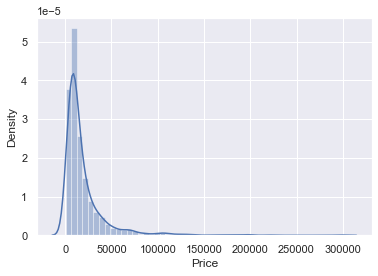

In [12]:
sns.distplot(data_no_mv['Price'],kde=True)

Dealing with outliers

In [13]:
top1=data_no_mv['Price'].quantile(0.99)
data_1=data_no_mv[data_no_mv['Price']<top1]

In [14]:
data_1.describe()

,Price,Mileage,EngineV,Year
count,3984.000000,3984.000000,3984.000000,3984.000000
mean,17837.117460,165.116466,2.743770,2006.292922
std,18976.268315,102.766126,4.956057,6.672745
min,600.000000,0.000000,0.600000,1969.000000
25%,6980.000000,93.000000,1.800000,2002.750000
50%,11400.000000,160.000000,2.200000,2007.000000
75%,21000.000000,230.000000,3.000000,2011.000000
max,129222.000000,980.000000,99.990000,2016.000000


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

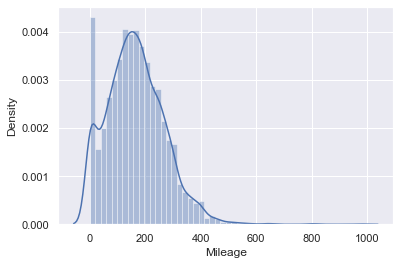

In [15]:
sns.distplot(data_1["Mileage"],kde=True)

In [16]:
q=data_1['Mileage'].quantile(0.99)

In [17]:
data_2=data_1[data_1['Mileage']<q]

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

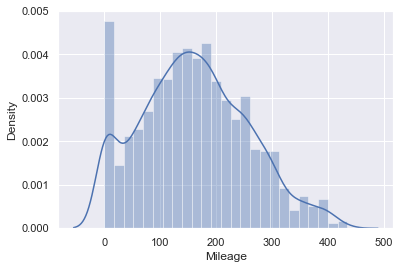

In [18]:
sns.distplot(data_2['Mileage'])

In [19]:
data_2.describe()

,Price,Mileage,EngineV,Year
count,3944.000000,3944.000000,3944.000000,3944.000000
mean,17933.880822,161.484026,2.747612,2006.389959
std,19008.212025,96.027108,4.980406,6.595986
min,600.000000,0.000000,0.600000,1969.000000
25%,7000.000000,92.000000,1.800000,2003.000000
50%,11500.000000,158.000000,2.200000,2007.000000
75%,21376.250000,230.000000,3.000000,2011.000000
max,129222.000000,435.000000,99.990000,2016.000000


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EngineV', ylabel='Density'>

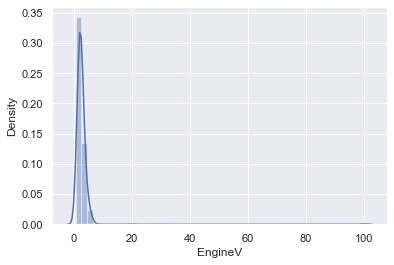

In [20]:
sns.distplot(data_2['EngineV'])

In [21]:
data_2[data_2['EngineV'].dropna()>90].value_counts()

Brand          Price   Body       Mileage  EngineV  Engine Type  Registration  Year
BMW            3000.0  sedan      350      99.99    Other        yes           1992    1
               6800.0  crossover  242      99.99    Diesel       no            2005    1
Mercedes-Benz  5500.0  sedan      100      99.99    Petrol       yes           2007    1
               8000.0  crossover  314      99.99    Gas          yes           2000    1
Renault        5650.0  hatch      175      99.99    Other        yes           2002    1
Volkswagen     2400.0  sedan      268      99.99    Petrol       yes           1989    1
               4800.0  sedan      190      99.99    Petrol       yes           1998    1
dtype: int64

In [22]:
data_3=data_2[data_2['EngineV']<6.5]

In [23]:
data_3[data_3['EngineV'].dropna()>90].value_counts()

Series([], dtype: int64)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

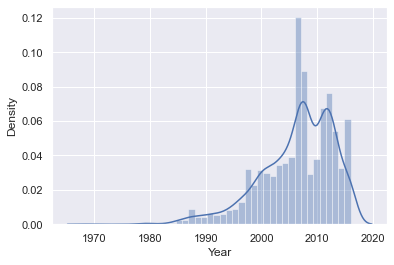

In [24]:
sns.distplot(data_3['Year'])

In [25]:
q=data_3['Year'].quantile(0.01)
data_4=data_3[data_3['Year']>q]

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

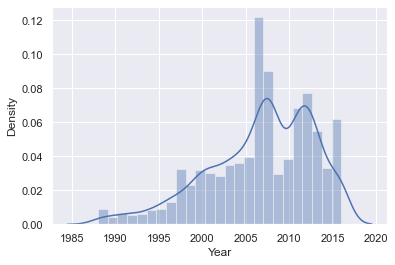

In [26]:
sns.distplot(data_4['Year'])

In [27]:
data_cleaned=data_4.reset_index(drop=True)

In [28]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3867 entries, 0 to 3866
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         3867 non-null   object 
 1   Price         3867 non-null   float64
 2   Body          3867 non-null   object 
 3   Mileage       3867 non-null   int64  
 4   EngineV       3867 non-null   float64
 5   Engine Type   3867 non-null   object 
 6   Registration  3867 non-null   object 
 7   Year          3867 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 241.8+ KB


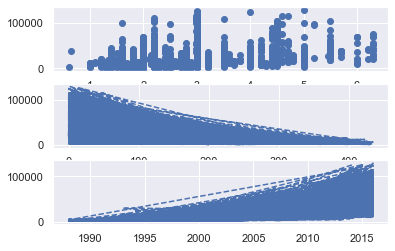

In [29]:
plt.subplot(3,1,1)
plt.plot(data_cleaned['EngineV'],data_cleaned['Price'],'bo')
plt.subplot(3,1,2)
plt.plot(data_cleaned['Mileage'],data_cleaned['Price'],'b--')
plt.subplot(3,1,3)
plt.plot(data_cleaned['Year'],data_cleaned['Price'],'b--')

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

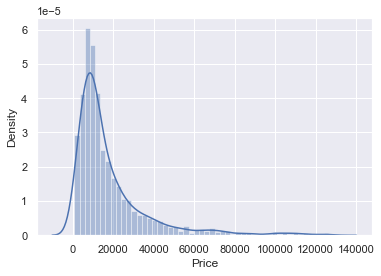

In [30]:
sns.distplot(data_cleaned['Price'])

In [31]:
data_cleaned.describe()

,Price,Mileage,EngineV,Year
count,3867.000000,3867.000000,3867.000000,3867.000000
mean,18194.455679,160.542539,2.450440,2006.709853
std,19085.855165,95.633291,0.949366,6.103870
min,800.000000,0.000000,0.600000,1988.000000
25%,7200.000000,91.000000,1.800000,2003.000000
50%,11700.000000,157.000000,2.200000,2008.000000
75%,21700.000000,225.000000,3.000000,2012.000000
max,129222.000000,435.000000,6.300000,2016.000000


In [32]:
log_price=np.log(data_cleaned['Price'])

In [33]:
data_cleaned['log_price']=log_price

In [34]:
data_cleaned.describe()

,Price,Mileage,EngineV,Year,log_price
count,3867.000000,3867.000000,3867.000000,3867.000000,3867.000000
mean,18194.455679,160.542539,2.450440,2006.709853,9.415703
std,19085.855165,95.633291,0.949366,6.103870,0.876616
min,800.000000,0.000000,0.600000,1988.000000,6.684612
25%,7200.000000,91.000000,1.800000,2003.000000,8.881836
50%,11700.000000,157.000000,2.200000,2008.000000,9.367344
75%,21700.000000,225.000000,3.000000,2012.000000,9.985068
max,129222.000000,435.000000,6.300000,2016.000000,11.769287


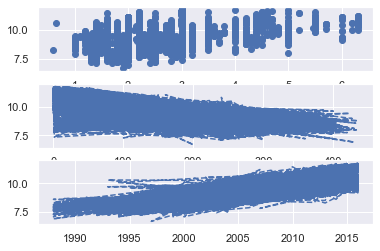

In [35]:
plt.subplot(3,1,1)
plt.plot(data_cleaned['EngineV'],data_cleaned['log_price'],'bo')
plt.subplot(3,1,2)
plt.plot(data_cleaned['Mileage'],data_cleaned['log_price'],'b--')
plt.subplot(3,1,3)
plt.plot(data_cleaned['Year'],data_cleaned['log_price'],'b--')

In [36]:
data_transformed=data_cleaned.drop(columns=['Price'])

In [37]:
data_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3867 entries, 0 to 3866
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         3867 non-null   object 
 1   Body          3867 non-null   object 
 2   Mileage       3867 non-null   int64  
 3   EngineV       3867 non-null   float64
 4   Engine Type   3867 non-null   object 
 5   Registration  3867 non-null   object 
 6   Year          3867 non-null   int64  
 7   log_price     3867 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 241.8+ KB


In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables=data_transformed[['EngineV','Year','Mileage']]
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif['Features']=variables.columns


In [39]:
vif

,VIF,Features
0,7.662068,EngineV
1,10.354854,Year
2,3.791584,Mileage


In [40]:
data_with_no_multicoll=data_transformed.drop(columns=['Year'])

In [41]:
data_with_no_multicoll.describe()

,Mileage,EngineV,log_price
count,3867.000000,3867.000000,3867.000000
mean,160.542539,2.450440,9.415703
std,95.633291,0.949366,0.876616
min,0.000000,0.600000,6.684612
25%,91.000000,1.800000,8.881836
50%,157.000000,2.200000,9.367344
75%,225.000000,3.000000,9.985068
max,435.000000,6.300000,11.769287


In [42]:
data_with_dummies=pd.get_dummies(data_with_no_multicoll,drop_first=True)

In [43]:
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [44]:
variables=data_with_dummies[[i for i in data_with_dummies.columns.values]]
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif['features']=variables.columns.values
vif

,vif,features
0,4.460434,Mileage
1,13.445639,EngineV
2,41.981260,log_price
3,2.603990,Brand_BMW
4,3.084356,Brand_Mercedes-Benz
5,1.830297,Brand_Mitsubishi
6,2.281498,Brand_Renault
7,2.406546,Brand_Toyota
8,3.312814,Brand_Volkswagen
9,1.583516,Body_hatch


In [45]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [46]:
cols=['log_price','Mileage', 'EngineV','Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [47]:
data_preprocessed=data_with_dummies[cols]

In [48]:
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [49]:
variables=data_preprocessed[[i for i in data_preprocessed.columns.values]]
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif['features']=variables.columns.values
vif

,vif,features
0,41.981260,log_price
1,4.460434,Mileage
2,13.445639,EngineV
3,2.603990,Brand_BMW
4,3.084356,Brand_Mercedes-Benz
5,1.830297,Brand_Mitsubishi
6,2.281498,Brand_Renault
7,2.406546,Brand_Toyota
8,3.312814,Brand_Volkswagen
9,1.583516,Body_hatch


In [50]:
variables=data_preprocessed[[i for i in data_preprocessed.columns.values[1:]]]
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif['features']=variables.columns.values
vif

,vif,features
0,4.459662,Mileage
1,7.841729,EngineV
2,2.294007,Brand_BMW
3,2.868649,Brand_Mercedes-Benz
4,1.641712,Brand_Mitsubishi
5,2.086774,Brand_Renault
6,2.162166,Brand_Toyota
7,2.844515,Brand_Volkswagen
8,1.464260,Body_hatch
9,1.534059,Body_other


In [51]:
data_with_dummies_new=pd.get_dummies(data_with_no_multicoll)
data_with_dummies_new.drop(columns='log_price')

,Mileage,EngineV,Brand_Audi,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_crossover,...,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Diesel,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_no,Registration_yes
0,277,2.0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
1,427,2.9,0,0,1,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
2,358,5.0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
3,240,4.2,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
4,120,2.0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,163,2.5,0,0,0,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,1
3863,35,1.6,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,1
3864,9,3.0,0,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
3865,1,3.5,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1


In [52]:
variables=data_with_dummies_new
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif['features']=variables.columns.values
vif

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,vif,features
0,2.365473,Mileage
1,1.812970,EngineV
2,4.018878,log_price
3,inf,Brand_Audi
4,inf,Brand_BMW
5,inf,Brand_Mercedes-Benz
6,inf,Brand_Mitsubishi
7,inf,Brand_Renault
8,inf,Brand_Toyota
9,inf,Brand_Volkswagen


Linear Regression Model

In [53]:
targets=data_preprocessed['log_price']
inputs=data_preprocessed.drop(columns=['log_price'])

In [54]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(inputs)


StandardScaler()

In [55]:
scaled_inputs=scaler.transform(inputs)

In [56]:
scaled_inputs

array([[ 1.2179077 , -0.47452478,  2.27971827, ..., -0.16209221,
         1.33267512,  0.32137366],
       [ 2.78660201,  0.47359854, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366],
       [ 2.06500263,  2.68588629, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366],
       ...,
       [-1.58482613,  0.57894557, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366],
       [-1.66848982,  1.10568075,  2.27971827, ..., -0.16209221,
         1.33267512,  0.32137366],
       [-0.38216049, -0.47452478, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366]])

Train test split

In [57]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(scaled_inputs,targets,test_size=0.2,random_state=365)

In [58]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [59]:
y_hat=reg.predict(x_train)

Text(0, 0.5, 'y_hat')

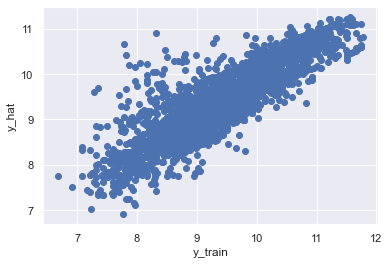

In [60]:
plt.scatter(y_train,y_hat)
plt.xlabel("y_train")
plt.ylabel("y_hat")

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residuals Plot')

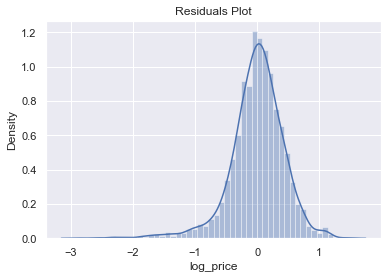

In [61]:
sns.distplot(y_train-y_hat)
plt.title("Residuals Plot")

In [62]:
reg.score(x_train,y_train)

0.744996578792662

Finding the weights and bias

In [63]:
reg.intercept_

9.415239458021299

In [64]:
reg.coef_

array([-0.44871341,  0.20903483,  0.0142496 ,  0.01288174, -0.14055166,
       -0.17990912, -0.06054988, -0.08992433, -0.1454692 , -0.10144383,
       -0.20062984, -0.12988747, -0.16859669, -0.12149035, -0.03336798,
       -0.14690868,  0.32047333])

In [65]:
df=pd.DataFrame(inputs.columns.values,columns=['Features'])
df['Weights']=reg.coef_
df

,Features,Weights
0,Mileage,-0.448713
1,EngineV,0.209035
2,Brand_BMW,0.014250
3,Brand_Mercedes-Benz,0.012882
4,Brand_Mitsubishi,-0.140552
5,Brand_Renault,-0.179909
6,Brand_Toyota,-0.060550
7,Brand_Volkswagen,-0.089924
8,Body_hatch,-0.145469
9,Body_other,-0.101444


In [66]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3867 entries, 0 to 3866
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         3867 non-null   object 
 1   Price         3867 non-null   float64
 2   Body          3867 non-null   object 
 3   Mileage       3867 non-null   int64  
 4   EngineV       3867 non-null   float64
 5   Engine Type   3867 non-null   object 
 6   Registration  3867 non-null   object 
 7   Year          3867 non-null   int64  
 8   log_price     3867 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 272.0+ KB


In [67]:
data_cleaned['Brand'].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

In [68]:
data_cleaned['Body'].unique()

array(['sedan', 'van', 'crossover', 'vagon', 'other', 'hatch'],
      dtype=object)

crossover is benchmark dummy for Body feature,audi for Brand,Diesel for Engine Type and no for registration


In [69]:
data_cleaned['Engine Type'].unique()

array(['Petrol', 'Diesel', 'Gas', 'Other'], dtype=object)

In [70]:
data_cleaned['Registration'].unique()

array(['yes', 'no'], dtype=object)

Testing model

In [71]:
y_hat_test=reg.predict(x_test)

(6.0, 13.0)

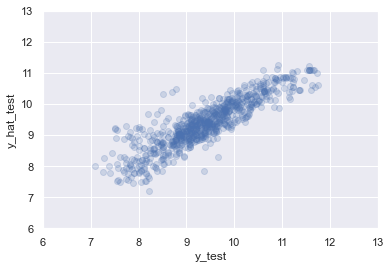

In [74]:
plt.scatter(y_test,y_hat_test,alpha=0.2)
plt.xlabel("y_test")
plt.ylabel("y_hat_test")
plt.xlim(6,13)
plt.ylim(6,13)

In [79]:
df=pd.DataFrame(data=np.exp(y_hat_test),columns=["y_hat_test"])
df.head()

,y_hat_test
0,10685.501696
1,3499.255242
2,7553.285218
3,7463.963017
4,11353.490075


In [84]:
df['Targets']=np.exp(y_test.reset_index(drop=True))

In [85]:
df

,y_hat_test,Targets
0,10685.501696,2300.0
1,3499.255242,2800.0
2,7553.285218,2500.0
3,7463.963017,6400.0
4,11353.490075,9150.0
...,...,...
769,29651.726363,29500.0
770,10732.071179,9600.0
771,13922.446953,18300.0
772,27487.751303,68500.0


In [86]:
df['residuals']=df['Targets']-df['y_hat_test']

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='residuals', ylabel='Density'>

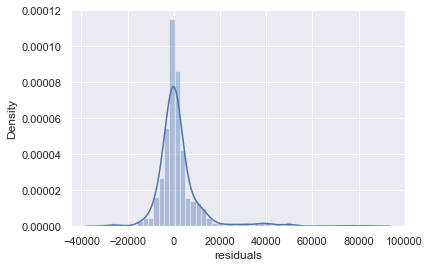

In [89]:
sns.distplot(df['residuals'],kde=True)

In [94]:
df['Difference%']=np.absolute(df['residuals']/df['Targets']*100)

In [95]:
df

,y_hat_test,Targets,residuals,Difference%
0,10685.501696,2300.0,-8385.501696,364.587030
1,3499.255242,2800.0,-699.255242,24.973402
2,7553.285218,2500.0,-5053.285218,202.131409
3,7463.963017,6400.0,-1063.963017,16.624422
4,11353.490075,9150.0,-2203.490075,24.081859
...,...,...,...,...
769,29651.726363,29500.0,-151.726363,0.514327
770,10732.071179,9600.0,-1132.071179,11.792408
771,13922.446953,18300.0,4377.553047,23.921055
772,27487.751303,68500.0,41012.248697,59.871896


In [96]:
df.describe()

,y_hat_test,Targets,residuals,Difference%
count,774.000000,774.000000,774.000000,774.000000
mean,15946.760167,18165.817106,2219.056939,36.256693
std,13133.197604,19967.858908,10871.218143,55.066507
min,1320.562768,1200.000000,-29456.498331,0.062794
25%,7413.644234,6900.000000,-2044.191251,12.108022
50%,11568.168859,11600.000000,142.518577,23.467728
75%,20162.408805,20500.000000,3147.343497,39.563570
max,77403.055224,126000.000000,85106.162329,512.688080


In [97]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [99]:
df.sort_values(by='Difference%')

,y_hat_test,Targets,residuals,Difference%
698,30480.85,30500.00,19.15,0.06
742,16960.31,16999.00,38.69,0.23
60,12469.21,12500.00,30.79,0.25
110,25614.14,25500.00,-114.14,0.45
367,42703.68,42500.00,-203.68,0.48
369,3084.69,3100.00,15.31,0.49
769,29651.73,29500.00,-151.73,0.51
272,9749.53,9800.00,50.47,0.52
714,23118.07,22999.00,-119.07,0.52
630,8734.58,8800.00,65.42,0.74
